## Importing the libraries

In [1015]:
import numpy as np
import matplotlib.pyplot as plt

This assignments has two sections:
* Linear Regression
* Kernel Regression




# Section 1:

**Linear Regression**

We will use the Boston_housing dataset for the regression problem. Run the below cell to get the following variables:
* `Training_data` = Training data matrix of shape $(n, d)$
* `labels` = label vector corresponding to the training data
* `test_data` = Test data matrix of shape $(n_1, d)$ where $n_1$ is the number of examples in test dataset.
* `test_labels` = label vector corresponding to the test data

Use this dataset for the regression problem.

In [1016]:
from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]

## Question 1
How many examples are there in the training dataset?



In [1017]:
## Enter your solution here
Training_data.shape

(404, 13)

## Question 2
How many examples are there in the test dataset?



In [1018]:
## Enter your solution here
Test_data.shape

(102, 13)

## Question 3

How many features are there in the dataset?



In [1019]:
## Enter your solution here
Training_data.shape[1]

13

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbb{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature, $\mathbb{x}$ is the feature matrix of shape $(d, n)$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is 

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbb{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbb{x}$ is of shape $(d+1, n)$ where the first row of $\mathbb{x}$ has entries as 1.


## Task 

Add the dummy feature in the feature matrix `Training_data` and test data matrix `test_data`. We will be using this new feature matrices (after adding te dummy feature) for learning the model.

Note: As per your convenience, you can convert the shape of the training dataset to $(d, n)$. 

In [1020]:
y = labels.reshape((-1, 1))
y_test = test_labels.reshape((-1, 1))
y.shape, y_test.shape

((404, 1), (102, 1))

In [1021]:
## Enter your solution here
X = np.concatenate((Training_data, np.ones((Training_data.shape[0], 1))), axis=1).T
X_test = np.concatenate((Test_data, np.ones((Test_data.shape[0], 1))), axis=1).T
X.shape, X_test.shape

((14, 404), (14, 102))

## Question 4
If the solution of optimization problem is obtained by setting the first derivative of loss function (squared loss) to zero, find the value of $w_0+w_1+...w_d$.




In [1022]:
## Enter your solution here
w = np.linalg.pinv(X@X.T)@X@y

In [1023]:
np.sum(w)

20.52458246465512

## Question 5
Find the average of the predictions made by the above model.



In [1024]:
## Enter your solution here
y_hat = X.T@w

In [1025]:
np.mean(y_hat)

22.30915841584223

## Question 6

Find the loss for the training data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1026]:
## Enter your solution here
loss = np.linalg.norm(y - y_hat) / np.sqrt(y_hat.shape[0])

In [1027]:
loss

4.552387969840814

## Question 7

Find the loss for the test data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1028]:
## Enter your solution here
y_hat_test = X_test.T@w

test_loss = np.linalg.norm(y_hat_test-y_test) / np.sqrt(y_hat_test.shape[0])

In [1029]:
test_loss

5.327662216181915

## Question 8
Find the weights using the gradient descent. Use a constant learning rate of $\eta = 10^{-10}$. Initialize the weight vector as zero vector and update the weights for 100 iterations. Enter the sum of all the weights.



In [1030]:
X.shape, y.shape

((14, 404), (404, 1))

In [1031]:
## Enter your solution here
eta = 1e-10
w_ = np.zeros((X.shape[0], 1))
epochs = 100

for i in range(epochs):
    w_ = w_ - 2*eta*((X@X.T)@w_ - X@y)

In [1032]:
np.sum(w_)

0.05895906119590261

## Question 9

Find the loss for the training data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1033]:
w_.shape, X.shape

((14, 1), (14, 404))

In [1034]:
## Enter your solution here
y_hat = X.T@w_

loss = np.linalg.norm(y - y_hat) / np.sqrt(y_hat.shape[0])

In [1035]:
loss

11.137273237021958

## Question 10

Find the loss for the test data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1036]:
X_test.shape, w_.shape

((14, 102), (14, 1))

In [1037]:
## Enter your solution here
y_hat_test = X_test.T@w_

test_loss = np.linalg.norm(y_hat_test-y_test) / np.sqrt(y_hat_test.shape[0])

In [1038]:
test_loss

10.964491250062148

## Question 11
Find the weights using the stochastic gradient descent. Use a constant learning rate of $\eta = 10^{-8}$. Initialize the weight vector as zero vector and update the weights for 1000 iterations. . Take the batch size of $⌈\text{number of samples}/5⌉ $. For sampling the batch examples in $ith$ iteration, set seed at $i$. The final weight is the last updated weight. Do not take the avearge of weights updated in all the iterations. Enter the sum of all the weights.




In [1039]:
X.shape, y.shape

((14, 404), (404, 1))

In [1040]:
## Enter your solution here
eta = 1e-8
epochs = 1000
w = np.zeros((X.shape[0], 1))

for i in range(epochs):
    indices = np.random.choice(X.shape[1], 100, replace=False)
    X_temp = X[:, indices]
    y_temp = y[indices, :]
    w = w - 2 * eta * (X_temp@X_temp.T@w - X_temp@y_temp)

In [1041]:
np.sum(w)

0.10885475109115737

## Question 12

Find the loss for the training data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1042]:
## Enter your solution here
y_hat = X.T@w

loss = np.linalg.norm(y - y_hat) / np.sqrt(y_hat.shape[0])

In [1043]:
loss

8.585095389659028

## Question 13

Find the loss for the test data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 


In [1044]:
## Enter your solution here
y_hat_test = X_test.T@w

test_loss = np.linalg.norm(y_hat_test-y_test) / np.sqrt(y_hat_test.shape[0])

In [1045]:
test_loss

8.232238672303415

# Section 2:

**kernel Regression**

We will generate the synthetic dataset for the kernel regression problem. Run the following cell to get the following variables:

`X` = Training data matrix of shape $(n, d)$. In the given dataset $d = 1$. 

`y` = label vector corresponding to the training dataset

In [1046]:
rng = np.random.default_rng(seed = 101)
X = np.arange(-2, 2, 0.01).reshape(-1, 1)
y = X**3 + rng.normal(0, 1, X.shape[0]).reshape(-1, 1)

## Question 14

Plot the scatter plot between feature and the labels. Enter your answer as 0.



In [1047]:
X.shape, y.shape

((400, 1), (400, 1))

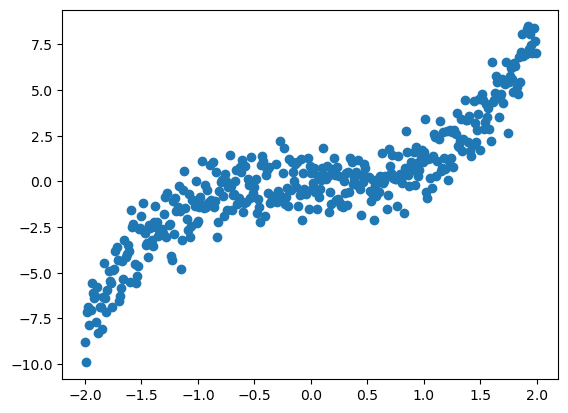

In [1048]:
## Enter your solution here
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

## Question 15
How many examples are there in the training dataset?



In [1049]:
## Enter your solution here
X.shape[0]

400

## Task:

Add the dummy feature in the feature matrix `X`and reshape it to the shape $(d, n)$.

In [1050]:
## Enter your solution here
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1).T

In [1051]:
X.shape

(2, 400)

## Question 16

Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as

$$w = \phi(\mathbb{x})\alpha$$

let us call the vector $\alpha$ as coefficient vector. Find the sum of elements in the coefficient vector.



In [1052]:
## Enter your solution here
K = (X.T@X + 1) ** 3
alp = np.linalg.pinv(K)@y

In [1053]:
np.sum(alp)

-0.02182769775390625

## Question 17

Find the sum of the predictions made by the kernel regression model of degree 3.



In [1054]:
X.shape, alp.shape, y.shape, K.shape

((2, 400), (400, 1), (400, 1), (400, 400))

In [1055]:
## Enter your solution here
y_hat = (alp.T@K).T

In [1056]:
y_hat.shape

(400, 1)

In [1057]:
np.sum(y_hat)

-54.81901863745094

## Question 18

Find the loss for the training data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1058]:
## Enter your solution here
loss = np.linalg.norm(y - y_hat) / np.sqrt(y_hat.shape[0])
loss

1.0113424951457248

### Test dataset

run the following cell to get the test data matrix `X_test` and corresponding label vector `y_test`.

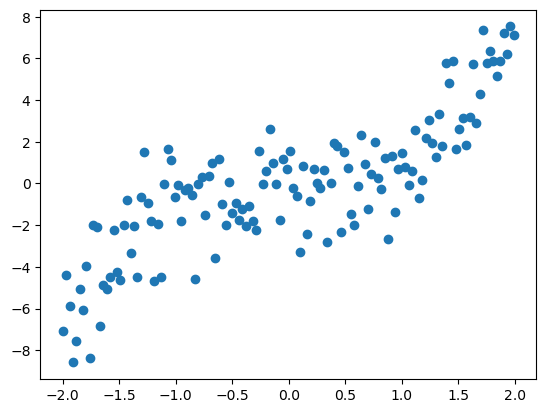

In [1059]:
rng = np.random.default_rng(seed = 102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew.reshape(-1, 1))).T
y_test = ynew.reshape(-1, 1)
plt.scatter(Xnew,ynew)

## Question 19

Find the loss for the test data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 



In [1060]:
X_test.shape

(2, 134)

In [1061]:
## Enter your solution here
K_test = (X.T @ X_test + 1) ** 3
K_test.shape, alp.shape

((400, 134), (400, 1))

In [1062]:
y_hat_test = (alp.T@K_test).T

In [1063]:
loss = np.linalg.norm(y_test - y_hat_test) / np.sqrt(y_hat_test.shape[0])
loss

1.5760831596834148